# Image Analysis - Coursework

Import the modules required for the notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io, exposure, measure
from skimage.filters import threshold_otsu
import skimage.morphology

[Ni superalloys](https://en.wikipedia.org/wiki/Superalloy) are amazing materials. Whereas most alloys become softer as the temperature increases, the alloys maintain their strength at very high temperatures and sometimes even get stronger! This ability, combined with their excellent corrosion resistance and toughness have made them the alloy of choice in high temperature applications like jet engines.


The image in the file *Coarse_250kx.tif* is a scanning electron microscope (SEM) image of RR1000, a nickel superalloy developed by Rolls-Royce. In this alloy, the high temperature strength of the alloys originates from the presence of small particles of an [ordered intermetalic](https://en.wikipedia.org/wiki/Intermetallic) phase called $\gamma\prime$ (gamma prime).


The image in file *Coarse_250kx.tif* is of a RR1000 sample where the particles have been etched away to leave behind dark holes which have the same shape and size as the $\gamma\prime$ particles.

## <span style="color: red"> Question 1</span> 
### 1.1 Use the <code>skimage</code> library and <code>matplotlib</code> to read in and display the image "Coarse_250kx.tif":

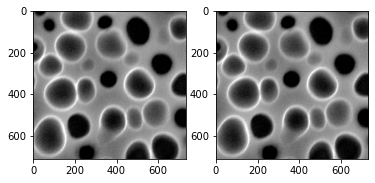

In [3]:
image = io.imread('D:/Manchester Semester 7/Career/Notion/Computing/3/Coarse_250kx.TIF')

image2 = plt.imread('D:/Manchester Semester 7/Career/Notion/Computing/3/Coarse_250kx.TIF')
f,images = plt.subplots(1,2)
images[0].imshow(image2,cmap='gray')
images[1].imshow(image,cmap='gray')
#print(image2)


#plt.imshow(image2)

### 1.2 Plot the intensity histogram for the image

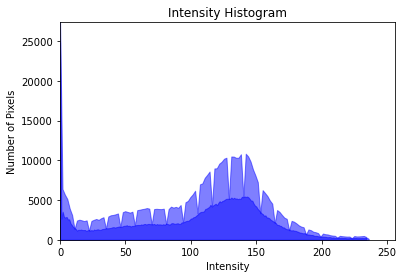

In [7]:

# Assuming 'image' is your input image
hist = exposure.histogram(image)


# Plot the histogram
plt.fill_between(hist[1], hist[0], alpha=0.5, color='b')

# Set the number of bins and adjust x-axis limits
plt.xlim([0, 256])  # x-axis limit to cover the intensity range
plt.ylim([0, hist[0].max() * 1.1])  # Adding some space above the max value for better visibility

# Adding axis labels
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')

# Title for clarity
plt.title('Intensity Histogram')

hist, bin_edges = np.histogram(image, bins=128)  # Example with 128 bins
plt.fill_between(bin_edges[:-1], hist, alpha=0.5, color='b')

# Display the histogram
plt.show()


## <span style="color: red"> Question 2</span>
### 2.1 Use manual thresholding to create a binary (black and white) image of the particles and display it. 

In [8]:
img = image # small correction by the TA

Text(0.5, 1.0, 'Orginal Image')

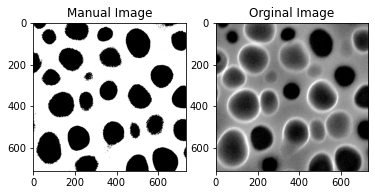

In [10]:
pixel = image > 90


f,images_1 = plt.subplots(1,2)

images_1[0].imshow(pixel,cmap='gray')
images_1[1].imshow(img,cmap='gray')

images_1[0].set_title('Manual Image')
images_1[1].set_title('Orginal Image')

87


Text(0.5, 1.0, 'Orginal Image')

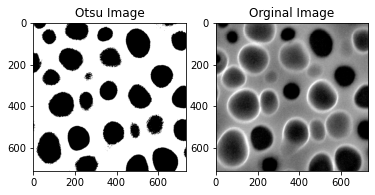

In [11]:
ots = threshold_otsu(image)
print(ots)

pixel = image > ots #condition given for image to be bigger than threshold one.


f,images_2 = plt.subplots(1,2)

images_2[0].imshow(pixel,cmap='gray')
images_2[1].imshow(img,cmap='gray')

images_2[0].set_title('Otsu Image')
images_2[1].set_title('Orginal Image')

### 2.3  Display the two thresholded images side by side.

Text(0.5, 1.0, 'Manual Image')

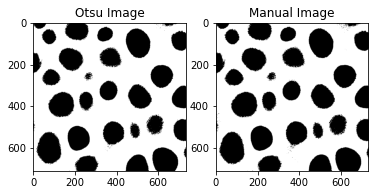

In [12]:
pixel_1 = image > ots
pixel = image > 90


f,images_3 = plt.subplots(1,2)

images_3[0].imshow(pixel_1,cmap='gray')
images_3[1].imshow(pixel,cmap='gray')

images_3[0].set_title('Otsu Image')
images_3[1].set_title('Manual Image')

### 2.4  Display an image showing the difference between the two images.

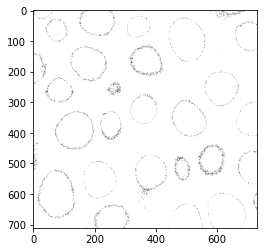

In [13]:
a = pixel.astype(int)
b = pixel_1.astype(int)

Diff = a - b
plt.imshow(Diff,cmap='gray')

## <span style="color: red"> Question 3</span> 

### 3.1 Use the <code>label</code> and <code>unique</code> function in <code>scipy.measure</code> to display an image with the dark hole at the centre of the image.

(250,)


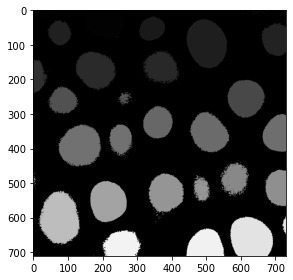

In [15]:
image = io.imread('D:/Manchester Semester 7/Career/Notion/Computing/3/Coarse_250kx.TIF')

plt.imshow(image, cmap='gray', interpolation= 'none')
ots = threshold_otsu(image)


pixel_1 = image < ots
io.imshow(pixel_1)

dark = measure.label(pixel_1) #using label function in scipy.measure
plt.imshow(dark, cmap='gray')

Alag = np.unique(dark) #using unique function in scipy.measure
print(Alag.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

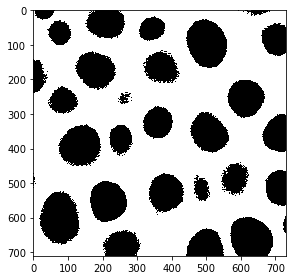

In [16]:
labels=np.unique(dark)
print(labels)
io.imshow(dark==0);


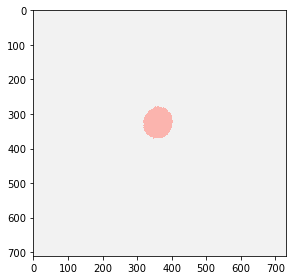

In [17]:
io.imshow(dark==101,cmap='Pastel1_r');

### 3.2 Use the <code>measure</code> function to measure the size (equivalent diameter) of the particle that existed in this hole before etching.

In [18]:
size = measure.regionprops(dark)
ans = size[100].equivalent_diameter
print("Equivalent diameter of the particle in the center is " + str(ans))

Equivalent diameter of the particle in the center is 88.32405499405212


### 3.3 Write the equivalent diameters of all particles which cover more than 10 pixels to a .txt file called diameters.txt 

In [24]:
# Assuming 'dark' is your labeled image containing particles
size = measure.regionprops(dark)  # Get properties of all labeled regions
particle = []  # To store the equivalent diameters of particles with area > 10 pixels
number = []    # To store the particle numbers

# Loop through all regions
for c, region in enumerate(size):
    area = region.area  # Get the area of the region
    equivalent_diameter = region.equivalent_diameter  # Get the equivalent diameter of the region
    
    # Check if the area is greater than 10 pixels
    if area > 10:
        particle.append(equivalent_diameter)  # Append the equivalent diameter
        number.append(c + 1)  # Append the particle number (c+1 to start from 1 instead of 0)

# Convert lists to numpy arrays for saving
number = np.array(number)
particle = np.array(particle)

# Open file and write the data
with open("D:/Manchester Semester 7/Career/Notion/Computing/3/diameter.txt", "w") as file:
    header = '\n'.join([
        "Particle  --  Equivalent diameter", 
        "-------------------------------"
    ])  # Define the heading
    np.savetxt(file, np.transpose([number, particle]), delimiter='-----------', fmt='%2f', comments='# ', header=header)

# Open and read the file to verify the contents
with open('D:/Manchester Semester 7/Career/Notion/Computing/3/diameter.txt', 'r') as file:
    content = file.read()

print(content)


# Particle  --  Equivalent diameter
# -------------------------------
1.000000-----------39.493271
2.000000-----------98.019720
6.000000-----------26.986905
14.000000-----------4.068429
25.000000-----------71.141600
30.000000-----------126.826004
32.000000-----------67.098249
34.000000-----------83.179226
39.000000-----------93.034845
41.000000-----------109.056548
46.000000-----------58.784115
71.000000-----------106.976058
79.000000-----------77.661675
82.000000-----------4.222008
84.000000-----------27.754458
91.000000-----------3.742410
101.000000-----------88.324055
105.000000-----------108.986475
107.000000-----------86.510705
110.000000-----------119.565604
111.000000-----------74.104535
133.000000-----------80.487532
139.000000-----------4.513517
140.000000-----------81.196271
145.000000-----------105.024160
146.000000-----------53.345013
147.000000-----------4.068429
153.000000-----------11.227231
159.000000-----------111.897443
175.000000-----------3.908820
184.000000--------

## <span style="color: red"> Question 4:</span> 
### The image "scalebar.png' contains a scale bar for the particle image you analysed above. What is the size (in nanometres) of the particle you measured in question 3.2?

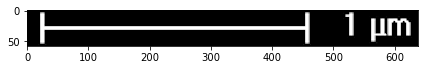

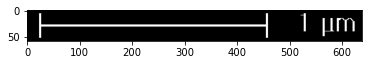

One micrometer is: 440 pixels
Size of the particle is: 200.90909090909093 nm


In [27]:
# Load the scale bar image
scale = io.imread('D:/Manchester Semester 7/Career/Notion/Computing/3/scalebar.png')
io.imshow(scale)
plt.show()

# Convert to binary to isolate the white scale bar
scale_white = scale > 254  # Assuming the scale bar is white
plt.imshow(scale_white, cmap='gray')
plt.show()

# Get the dimensions of the scale bar
# You mentioned the scale is between pixel 20 and 460
scaleW = scale[:, 20:460]
PixelLength = 460 - 20  # Length of the scale bar in pixels

# Print the pixel length of the scale bar
print('One micrometer is: ' + str(PixelLength) + ' pixels') 

# Particle size in pixels from question 3.2
E_Diameter = 88.4  # Replace this with the actual equivalent diameter from 3.2

# Conversion factor (1 micrometer = 1000 nanometers)
# Convert the equivalent diameter from pixels to nanometers
nm_per_pixel = 1000 / PixelLength  # How many nanometers one pixel represents
particle_size_nm = E_Diameter * nm_per_pixel  # Convert particle size to nanometers

# Print the size of the particle in nanometers
print('Size of the particle is: ' + str(particle_size_nm) + ' nm')
